In [1]:
!pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 831.4 MB 3.0 kB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.9.0+cu102 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.9.0+cu102 whic

In [2]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
# !pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 5.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=fe2b55c330c9cccb604d7bf46fcd173574d0025319ba87b65d3b9b80edf453b7
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.co

In [3]:
import torch
print(torch.__version__)

1.9.0+cu102


In [4]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")   # please manually install torch 1.9 if Colab changes its default version

1.9.0+cu102 True


In [5]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [6]:
def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(), plt.imshow(im), plt.axis('off');

In [7]:
!unzip /content/train.zip

Archive:  /content/train.zip
  inflating: train/10464445726_6f1e3bbe6a_k.jpg  
  inflating: train/12037308314_e16fb3a0f7_k.jpg  
  inflating: train/120853323_d4788431b9_b.jpg  
  inflating: train/12288043903_fe1ea17a4e_k.jpg  
  inflating: train/12288355124_5e340d3de3_k.jpg  
  inflating: train/12288446656_2c6a90e6f5_k.jpg  
  inflating: train/126700562_8e27720147_b.jpg  
  inflating: train/1297451346_5b92bdac08_b.jpg  
  inflating: train/14321263043_b76ef054d3_k.jpg  
  inflating: train/145053828_e0e748717c_b.jpg  
  inflating: train/14666848163_8be8e37562_k.jpg  
  inflating: train/15290896925_884ab33fd3_k.jpg  
  inflating: train/15331928994_d5b82eb368_k.jpg  
  inflating: train/154446334_5d41cd1375_b.jpg  
  inflating: train/155815494_800fc9aa32_b.jpg  
  inflating: train/15717689633_5f7f78c28e_k.jpg  
  inflating: train/16435593892_2aa8118f4a_k.jpg  
  inflating: train/17156759330_5af4f5a5b8_k.jpg  
  inflating: train/17178818589_16e58fc1e5_k.jpg  
  inflating: train/18849792632_a

In [8]:
!unzip /content/val.zip

Archive:  /content/val.zip
  inflating: val/14898532020_ba6199dd22_k.jpg  
  inflating: val/16335852991_f55de7958d_k.jpg  
  inflating: val/24631331976_defa3bb61f_k.jpg  
  inflating: val/2917282960_06beee649a_b.jpg  
  inflating: val/3800636873_ace2c2795f_b.jpg  
  inflating: val/3825919971_93fb1ec581_b.jpg  
  inflating: val/410488422_5f8991f26e_b.jpg  
  inflating: val/4581425993_72b9b15fc0_b.jpg  
  inflating: val/4838031651_3e7b5ea5c7_b.jpg  
  inflating: val/5555705118_3390d70abe_b.jpg  
  inflating: val/5603212091_2dfe16ea72_b.jpg  
  inflating: val/6810773040_3d81036d05_k.jpg  
  inflating: val/8053085540_a72bd21a64_k.jpg  
  inflating: val/via_region_data.json  


In [9]:
def get_balloon_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts





for d in ["train", "val"]:
    DatasetCatalog.register("new_balloon_" + d, lambda d=d: get_balloon_dicts("/content/" + d))
    MetadataCatalog.get("new_balloon_" + d).set(thing_classes=["balloon"])

balloon_metadata = MetadataCatalog.get("new_balloon_train")


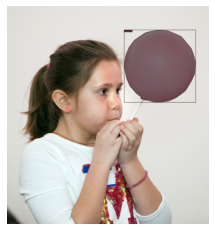

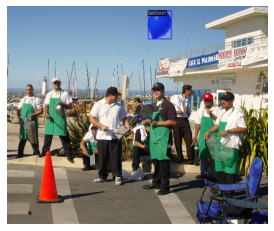

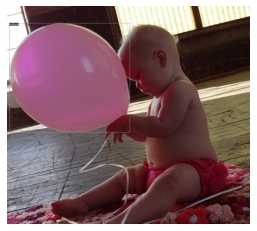

In [10]:
import matplotlib.pyplot as plt
dataset_dicts = get_balloon_dicts("/content/train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=balloon_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

In [14]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("new_balloon_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 100   # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[09/29 11:06:50 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/29 11:06:51 d2.engine.train_loop]: Starting training from iteration 0
[09/29 11:17:17 d2.utils.events]:  eta: 0:40:32  iter: 19  total_loss: 2.015  loss_cls: 0.6982  loss_box_reg: 0.6251  loss_mask: 0.6877  loss_rpn_cls: 0.04158  loss_rpn_loc: 0.01032  time: 31.0301  data_time: 0.0240  lr: 4.7703e-05  max_mem: 0M
[09/29 11:26:45 d2.utils.events]:  eta: 0:28:46  iter: 39  total_loss: 1.673  loss_cls: 0.468  loss_box_reg: 0.6873  loss_mask: 0.4657  loss_rpn_cls: 0.0182  loss_rpn_loc: 0.005875  time: 29.6426  data_time: 0.0095  lr: 9.7653e-05  max_mem: 0M
[09/29 11:36:58 d2.utils.events]:  eta: 0:20:02  iter: 59  total_loss: 1.342  loss_cls: 0.3239  loss_box_reg: 0.6388  loss_mask: 0.3186  loss_rpn_cls: 0.01915  loss_rpn_loc: 0.01253  time: 29.9823  data_time: 0.0090  lr: 0.0001476  max_mem: 0M
[09/29 11:47:22 d2.utils.events]:  eta: 0:10:05  iter: 79  total_loss: 1.047  loss_cls: 0.2091  loss_box_reg: 0.588  loss_mask: 0.2072  loss_rpn_cls: 0.03403  loss_rpn_loc: 0.005917  time: 30.2

In [15]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold

predictor = DefaultPredictor(cfg)

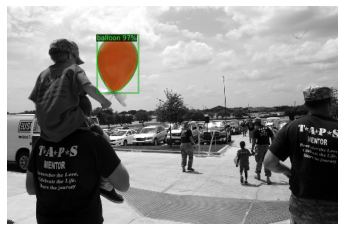

In [16]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_balloon_dicts("/content/val")
for d in random.sample(dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=balloon_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])